In [1]:
# 1. 사용할 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


In [2]:
# 랜덤시드 고정시키기
np.random.seed(5)

In [3]:
# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [4]:
# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)


# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset_X = []
    dataset_Y = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        for si in range(len(subset)-1):
            features = note2features(subset[si])            
            dataset_X.append(features)
        dataset_Y.append([note2idx[subset[window_size]]])
    return np.array(dataset_X), np.array(dataset_Y)

# 속성 변환 함수
def note2features(note):
    features = []
    features.append(note2scale[note[0]]/float(max_scale_value))
    features.append(note2length[note[1]])
    return features

In [5]:
# 2. 데이터 준비하기

# 코드 사전 정의

note2scale = {'c':0, 'd':1, 'e':2, 'f':3, 'g':4, 'a':5, 'b':6}
note2length = {'4':0, '8':1}

note2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2note = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

max_scale_value = 6.0
    
# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [6]:
# 3. 데이터셋 생성하기

x_train, y_train = seq2dataset(seq, window_size = 4)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 2))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  12


In [7]:
# 4. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 2), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [8]:
# 5. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# 6. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성
history.init()

In [10]:
for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()

epochs : 0
Epoch 1/1
 - 3s - loss: 2.3091 - acc: 0.1400
epochs : 1
Epoch 1/1
 - 1s - loss: 2.0177 - acc: 0.3400
epochs : 2
Epoch 1/1
 - 1s - loss: 1.9621 - acc: 0.3400
epochs : 3
Epoch 1/1
 - 1s - loss: 1.9462 - acc: 0.3400
epochs : 4
Epoch 1/1
 - 1s - loss: 1.9359 - acc: 0.3400
epochs : 5
Epoch 1/1
 - 0s - loss: 1.9285 - acc: 0.3400
epochs : 6
Epoch 1/1
 - 1s - loss: 1.9224 - acc: 0.3400
epochs : 7
Epoch 1/1
 - 0s - loss: 1.9172 - acc: 0.3400
epochs : 8
Epoch 1/1
 - 0s - loss: 1.9124 - acc: 0.3400
epochs : 9
Epoch 1/1
 - 0s - loss: 1.9075 - acc: 0.3600
epochs : 10
Epoch 1/1
 - 0s - loss: 1.9020 - acc: 0.3600
epochs : 11
Epoch 1/1
 - 1s - loss: 1.8946 - acc: 0.3600
epochs : 12
Epoch 1/1
 - 1s - loss: 1.8827 - acc: 0.3600
epochs : 13
Epoch 1/1
 - 1s - loss: 1.8687 - acc: 0.3600
epochs : 14
Epoch 1/1
 - 1s - loss: 1.8549 - acc: 0.3600
epochs : 15
Epoch 1/1
 - 1s - loss: 1.8395 - acc: 0.3600
epochs : 16
Epoch 1/1
 - 1s - loss: 1.8247 - acc: 0.3600
epochs : 17
Epoch 1/1
 - 0s - loss: 2.027

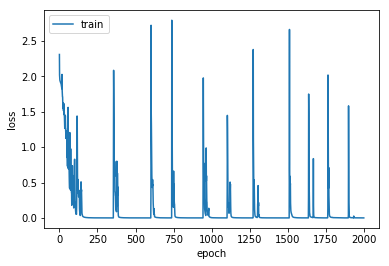

In [11]:
# 7. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [12]:
# 8. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

50/50 [==============================] - 0s 10ms/step
acc: 100.00%


In [13]:
# 9. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2note[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

note_onestep = seq_out

model.reset_states()

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in

seq_in_featrues = []

for si in seq_in:
    features = note2features(si)
    seq_in_featrues.append(features)

for i in range(pred_count):
    sample_in = np.array(seq_in_featrues)
    sample_in = np.reshape(sample_in, (1, 4, 2)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2note[idx])
    
    features = note2features(idx2note[idx])
    seq_in_featrues.append(features)
    seq_in_featrues.pop(0)

model.reset_states()

note_fullsong = seq_out

In [14]:
# 결과 출력
print("one step prediction : ", note_onestep)
print("full song prediction : ", note_fullsong)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [23]:
import music21 as m21
from writeMIDI import writeMIDI

def note2midi(notes, num):    # input : seq_out
    n = []
    global start
    start = 0    # 맨 첫 note의 시작 위치
    for i in range(len(notes)):
        #print(notes[i][0], notes[i][1])
        timing = int(8/int(notes[i][1]))
        
        if timing == 1: n.append((notes[i][0]+'5',start+i,1,120))
        else :
            n.append((notes[i][0]+'5',start+i,1*timing,120))
            start += 1
        
        # Output MIDI (Root, Inst., BPM, Notes, File_name)
        writeMIDI('C','piano', 130, n, ('LSTM result_%d' % num))
        
    return print("LSTM result_%d export complete!" % num)

note2midi(note_onestep, 1)
note2midi(note_fullsong, 2)

Result_1 export complete!
Result_2 export complete!
